# Import library

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 
import numpy as np

# Load & Plot Input Image

Shape citra 1 :  (64, 64, 3)
Shape citra 2 :  (1200, 1200, 4)


Text(0.5, 1.0, 'Citra 2')

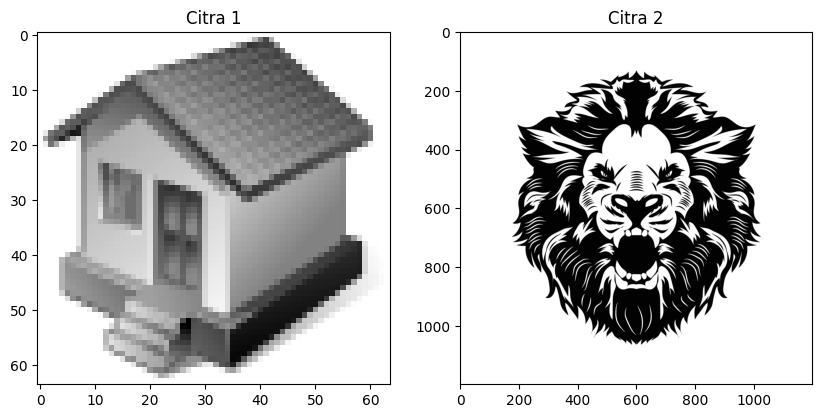

In [16]:
citra1 = imread(fname="home.png") # membaca citra dengan file name
citra2 = imread(fname="lion.png") 

print('Shape citra 1 : ', citra1.shape)
print('Shape citra 2 : ', citra2.shape)

# menampilkan gambar dengan 1 baris dan 2 kolom dengan ukuran 10x10
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray') # menampilkan citra1
ax[0].set_title("Citra 1")
ax[1].imshow(citra2, cmap = 'gray') # menampilkan citra2
ax[1].set_title("Citra 2")

# Code Asal Matlab

In [17]:
#%proses filter median untuk citra mobil
#for baris=2 : tinggiA-1
#    for kolom=2 : lebarA-1
#        dataA = [inputMobil(baris-1, kolom-1) inputMobil(baris-1, kolom) inputMobil(baris-1, kolom+1)  ...
#              inputMobil(baris, kolom-1) inputMobil(baris, kolom) inputMobil(baris, kolom+1)  ...
#              inputMobil(baris+1, kolom-1) inputMobil(baris+1, kolom) inputMobil(baris+1, kolom+1)];
#        % Urutkan
#        for i=1 : 8
#            for j=i+1 : 9
#                if dataA(i) > dataA(j)
#                    tmpA = dataA(i);
#                    dataA(i) = dataA(j);
#                    dataA(j) = tmpA;
#                end
#            end
#        end      
#        % Ambil nilai median
#        outputMobil(baris, kolom) = dataA(5);
#    end
#end

# Menyiapkan variable output

In [18]:
# # Menyalin citra dari citra original
copyCitra1 = citra1.copy()
copyCitra2 = citra2.copy()

m1, n1 = copyCitra1.shape[:2] # shape[:2] untuk mendapatkan dimensi tinggi dan lebar
output1 = np.empty([m1, n1]) # membuat array kosong dengan ukuran [m1, n1] 

m2, n2 = copyCitra2.shape[:2]
output2 = np.empty([m2, n2])
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)

print('m1 : ',m1)
print('n1 : ',n1)
print()

print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (64, 64, 3)
Shape output citra 1 :  (64, 64)
m1 :  64
n1 :  64

Shape copy citra 2 :  (1200, 1200, 4)
Shape output citra 3 :  (1200, 1200)
m2 :  1200
n2 :  1200



# Proses Filter Median Pada Citra Input 1

In [19]:
output1 = np.zeros_like(copyCitra1, dtype=np.float64)


for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        dataA = [copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1-1, b1+1], \
              copyCitra1[a1, b1-1], copyCitra1[a1, b1], copyCitra1[a1, b1+1], \
              copyCitra1[a1+1, b1-1], copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]]
        
        # Urutkan
        for i in range(1, 8):
            for j in range(i, 9):
                if np.any(dataA[i] > dataA[j]):
                    tmpA = dataA[i]
                    dataA[i] = dataA[j]
                    dataA[j] = tmpA
        
        output1[a1, b1] = dataA[5]

# Proses Filter Median Pada Citra Input 2

In [20]:
output2 = np.zeros_like(copyCitra2, dtype=np.float64)

for baris in range(0, m2-1):
    for kolom in range(0, n2-1):
        a1 = baris
        b1 = kolom
        dataA = [copyCitra2[a1-1, b1-1], copyCitra2[a1-1, b1], copyCitra2[a1-1, b1+1], \
              copyCitra2[a1, b1-1], copyCitra2[a1, b1], copyCitra2[a1, b1+1], \
              copyCitra2[a1+1, b1-1], copyCitra2[a1+1, b1], copyCitra2[a1+1, b1+1]]
        
        # Urutkan
        for i in range(1, 8):
            for j in range(i, 9):
                if np.any(dataA[i] > dataA[j]):
                    tmpA = dataA[i];
                    dataA[i] = dataA[j];
                    dataA[j]= tmpA;
        
        output2[a1, b1] = dataA[5]



# Plot Citra Input dan Output Hasil dari Filter Rerata

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Output Citra 2')

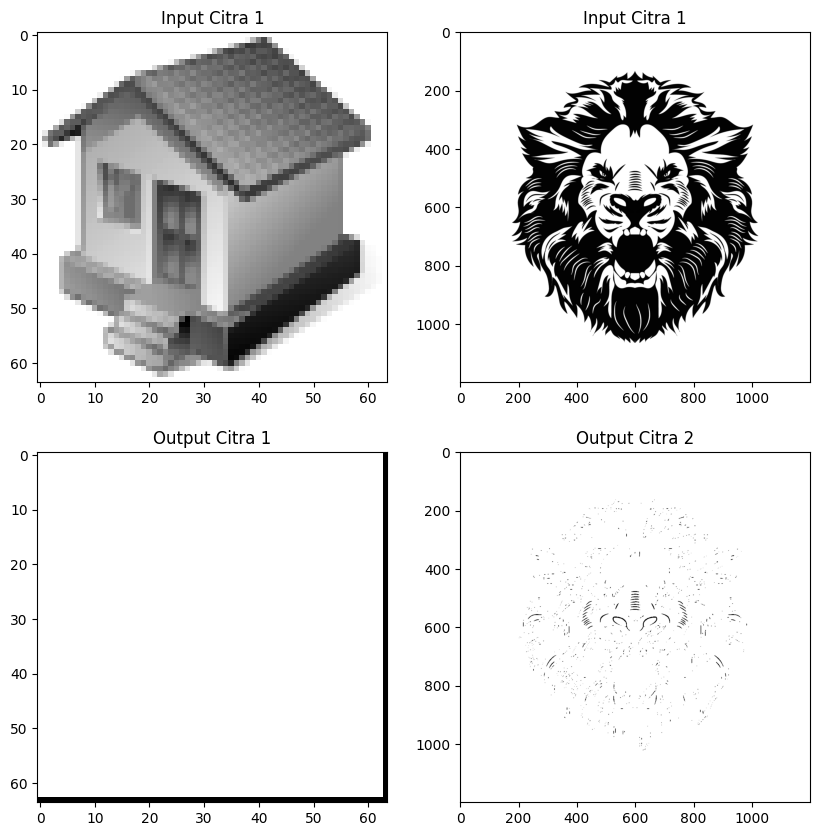

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(citra1, cmap = 'gray')
ax[0].set_title("Input Citra 1")

ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Input Citra 1")

ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("Output Citra 1")

ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("Output Citra 2")